In [1]:
import pandas as pd # library for data analsysis
import requests

##### Read Covid cases excel file

In [2]:
df_Covid =pd.read_csv('datasets_covid_19_india.csv')

In [3]:
df_Covid.shape

(5304, 7)

In [4]:
# Remove Total rows
df_Covid = df_Covid[df_Covid['State_Name']!='Total']

In [5]:
# Rename the columns to make it more readable
df_Covid.rename(columns={"State" : "State Code", "State_Name":"State"}, inplace=True)

In [6]:
df_Covid.head(5)

,Unnamed: 0,Date,State Code,Confirmed,Deceased,Recovered,State
0,0,01-Apr-20,AN,0,0,0,Andaman and Nicobar Islands
1,1,01-Apr-20,AP,67,0,1,Andhra Pradesh
2,2,01-Apr-20,AR,0,0,0,Arunachal Pradesh
3,3,01-Apr-20,AS,15,0,0,Assam
4,4,01-Apr-20,BR,3,0,0,Bihar


In [7]:
df_Covid['Date']=pd.to_datetime(df_Covid.Date)

In [8]:
df_Covid['Month']=df_Covid['Date'].dt.month

In [9]:
df_Covid.head()

,Unnamed: 0,Date,State Code,Confirmed,Deceased,Recovered,State,Month
0,0,2020-04-01,AN,0,0,0,Andaman and Nicobar Islands,4
1,1,2020-04-01,AP,67,0,1,Andhra Pradesh,4
2,2,2020-04-01,AR,0,0,0,Arunachal Pradesh,4
3,3,2020-04-01,AS,15,0,0,Assam,4
4,4,2020-04-01,BR,3,0,0,Bihar,4


In [10]:
df_month = df_Covid.groupby('Month')['Confirmed'].sum()

In [11]:
df_month.plot()

In [ ]:
df_state = df_Covid.groupby('State')['Confirmed'].agg({'Total cases': 'sum'})

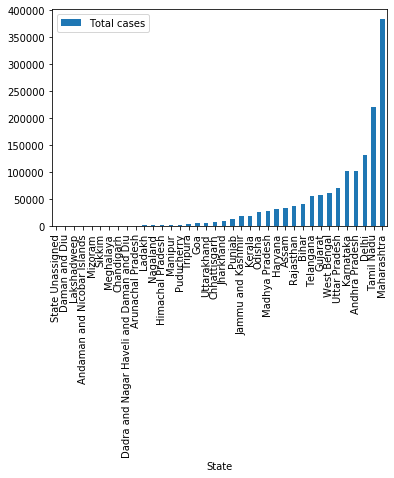

In [13]:
df_state.sort_values(by=['Total cases']).plot.bar()

In [14]:
df_state.sort_values(by=['Total cases'],inplace=True)

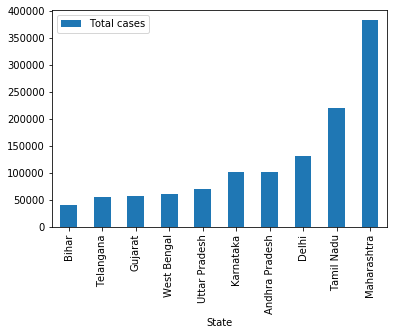

In [15]:
df_state.tail(10).plot.bar()

##### Read per capita income data from wikipedia page

In [16]:
from bs4 import BeautifulSoup 
import urllib.request

In [17]:
page = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP_per_capita')
soup = BeautifulSoup(page,'lxml')
all_tables=soup.find_all("table")
right_table=soup.find('table', class_='wikitable sortable')

In [18]:
A=[]
B=[]
C=[]


for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==6:
        A.append((cells[0].find(text=True)).replace('\n',''))
        B.append((cells[1].find(text=True)).replace('\n',''))
        C.append((cells[2].find(text=True)).replace('\n',''))

In [19]:

df_capita = pd.DataFrame(A,columns=['Rank'])
df_capita['State']=B
df_capita['Per Capita Income']=C
df_capita.shape

(34, 3)

In [20]:
df_capita.head(10)

,Rank,State,Per Capita Income
0,1,Goa,"₹ 4,58,304"
1,2,Delhi,"₹ 3,65,529"
2,3,Sikkim,"₹ 3,57,643"
3,4,Chandigarh,"₹ 3,29,209"
4,5,Haryana,"₹ 2,36,147"
5,6,Puducherry,"₹ 2,20,461"
6,7,Karnataka,"₹ 2,10,887"
7,8,Telangana,"₹ 2,04,488"
8,9,Kerala,"₹ 2,04,105"
9,10,Uttarakhand,"₹ 1,98,738"


##### Read Indian cities data file

In [21]:
df_cities = pd.read_csv('Indian_Cities.csv')

In [22]:
df_cities.shape

(213, 6)

In [23]:
df_citiesIncome = pd.merge(df_cities, df_capita)
                 
df_citiesIncome.sort_values(by=['Per Capita Income'],inplace=True)


In [24]:
df_citiesIncome.head(10)

,City,Lat,Long,country,iso2,State,Rank,Per Capita Income
169,Port Blair,11.666667,92.750000,India,IN,Andaman and Nicobar Islands,15,N/A
79,Krishnanagar,23.405761,88.490733,India,IN,West Bengal,23,"₹ 1,09,491"
78,Kolkata,22.562627,88.363044,India,IN,West Bengal,23,"₹ 1,09,491"
77,Haora,22.576882,88.318566,India,IN,West Bengal,23,"₹ 1,09,491"
76,Haldia,22.025278,88.058333,India,IN,West Bengal,23,"₹ 1,09,491"
75,Bhatpara,22.866431,88.401129,India,IN,West Bengal,23,"₹ 1,09,491"
74,Barddhaman,23.255716,87.856906,India,IN,West Bengal,23,"₹ 1,09,491"
73,Asansol,23.683333,86.983333,India,IN,West Bengal,23,"₹ 1,09,491"
72,Alipurduar,26.483500,89.522855,India,IN,West Bengal,23,"₹ 1,09,491"
80,Shiliguri,26.710035,88.428512,India,IN,West Bengal,23,"₹ 1,09,491"


In [25]:
df_citiesIncome.shape

(173, 8)

In [26]:
df_state.head(5)

,Total cases
State,
State Unassigned,0
Daman and Diu,0
Lakshadweep,0
Andaman and Nicobar Islands,334
Mizoram,361


In [27]:
df_temp = df_state.reset_index()

In [28]:
df_temp.head()

,State,Total cases
0,State Unassigned,0
1,Daman and Diu,0
2,Lakshadweep,0
3,Andaman and Nicobar Islands,334
4,Mizoram,361


##### Merge the tables

In [29]:
df_all = pd.merge(df_citiesIncome,df_temp)

In [30]:
df_all.head()

,City,Lat,Long,country,iso2,State,Rank,Per Capita Income,Total cases
0,Port Blair,11.666667,92.750000,India,IN,Andaman and Nicobar Islands,15,N/A,334
1,Krishnanagar,23.405761,88.490733,India,IN,West Bengal,23,"₹ 1,09,491",60830
2,Kolkata,22.562627,88.363044,India,IN,West Bengal,23,"₹ 1,09,491",60830
3,Haora,22.576882,88.318566,India,IN,West Bengal,23,"₹ 1,09,491",60830
4,Haldia,22.025278,88.058333,India,IN,West Bengal,23,"₹ 1,09,491",60830


In [31]:
# exluce states with more than 50k positive cases

covidlessthan50k = df_all[df_all['Total cases']<50000]
df_final = df_all['Total cases']=covidlessthan50k

In [32]:
df_final.shape

(86, 9)

In [33]:
df_final.head()

,City,Lat,Long,country,iso2,State,Rank,Per Capita Income,Total cases
0,Port Blair,11.666667,92.750000,India,IN,Andaman and Nicobar Islands,15,N/A,334
10,Ajmer,26.452103,74.638667,India,IN,Rajasthan,22,"₹ 1,10,606",37564
11,Udaipur,24.579510,73.690508,India,IN,Rajasthan,22,"₹ 1,10,606",37564
12,Tonk,26.168672,75.786111,India,IN,Rajasthan,22,"₹ 1,10,606",37564
13,Sikar,27.614778,75.138671,India,IN,Rajasthan,22,"₹ 1,10,606",37564


##### Use Foursquare API to get city/town details

In [43]:
# @hidden_cell
CLIENT_ID='ZAVDAXBVCON1DDXQYJHAMVLX4MU2T4J0QTZ1J0FII0ECZO4M' 
CLIENT_SECRET='1ZQWMEWG2DKY1DFRL0Q21PO5OZRZSUGW0RRSEZXKW0C4RW50' 
VERSION='20200810'

# Locatio IQ token
NWx='e1c5def38001b1'

In [44]:
# defining radius and limit of venues to get
radius=500
LIMIT=100

In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [46]:
City_places = getNearbyVenues(names=df_final['City'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Long']
                                  )

Port Blair
Ajmer
Udaipur
Tonk
Sikar
Pali
Kota
Jodhpur
Jaipur
Bikaner
Bhilwara
Bharatpur
Alwar
Rampura
Agartala
Kohima
Aizawl  
Itanagar
Patiala
Pathankot
Ludhiana
Haripur
Amritsar
Abohar
Shimla
DehraDun
Thiruvananthapuram
Kollam
Kochi
Calicut
Alappuzha
Puducherry
Panipat
Panchkula
Ambala
Bhiwani
Faridabad
Gurugram
Hisar
Karnal
Rohtak
Sirsa
Sonipat
Chandigarh 
Gangtok
Panaji
Patna
Purnea
Bhagalpur
Muzaffarpur
Gaya
Aurangabad
Imphal
Jorapokhar
Ranchi
Jamshedpur
Dhanbad
Tezpur
Dispur
Dibrugarh
Silchar
Jorhat
Guwahati
Shillong 
Gwalior
Indore
Jabalpur
Ratlam
Saugor
Ujjain
Bhopal 
Saidpur
Jammu
Baramula
Srinagar
Talcher
Samlaipadar
Raurkela
Cuttack
Brahmapur
Bhubaneshwar
Brajrajnagar
Puri
Raipur
Bilaspur
Bhilai


In [47]:
City_places

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Port Blair,11.666667,92.750000,Netaji Stadium,11.670649,92.748761,Baseball Field
1,Ajmer,26.452103,74.638667,Diggi Bazaar,26.451001,74.636901,Thrift / Vintage Store
2,Ajmer,26.452103,74.638667,Reliance Fresh,26.449627,74.636814,Convenience Store
3,Ajmer,26.452103,74.638667,HP World,26.450115,74.641241,Electronics Store
4,Ajmer,26.452103,74.638667,honeydew,26.455473,74.637061,Indian Restaurant
5,Udaipur,24.579510,73.690508,Udaipur,24.578505,73.686676,City
6,Udaipur,24.579510,73.690508,Krishna Daal Bati,24.576178,73.693634,Indian Restaurant
7,Sikar,27.614778,75.138671,Shri Shayam Chat Bhandar,27.613562,75.135455,Fast Food Restaurant
8,Pali,25.775125,73.320611,hiltop plastic industries,25.775427,73.322717,Jewelry Store
9,Pali,25.775125,73.320611,Sonaiwala,25.774900,73.323600,Jewelry Store


In [48]:
City_places.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Abohar,5,5,5,5,5,5
Agartala,6,6,6,6,6,6
Aizawl,4,4,4,4,4,4
Ajmer,4,4,4,4,4,4
Alappuzha,4,4,4,4,4,4
Alwar,4,4,4,4,4,4
Ambala,1,1,1,1,1,1
Amritsar,10,10,10,10,10,10
Aurangabad,1,1,1,1,1,1


In [50]:
# one hot encoding
best_neighbourhood = pd.get_dummies(City_places[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
best_neighbourhood['Neighbourhood'] = City_places['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [best_neighbourhood.columns[-1]] + list(best_neighbourhood.columns[:-1])
best_neighbourhood.head()

,ATM,Accessories Store,African Restaurant,Arcade,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,...,Sporting Goods Shop,Temple,Tennis Court,Theater,Thrift / Vintage Store,Train Station,Vegetarian / Vegan Restaurant,Video Store,Women's Store,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Port Blair
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Ajmer
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ajmer
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ajmer
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ajmer


In [52]:
best_neighbourhood.shape

(347, 103)

In [53]:
best_neighbourhood_grouped = best_neighbourhood.groupby('Neighbourhood').mean().reset_index()
best_neighbourhood_grouped

,Neighbourhood,ATM,Accessories Store,African Restaurant,Arcade,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Bakery,Bank,...,Spa,Sporting Goods Shop,Temple,Tennis Court,Theater,Thrift / Vintage Store,Train Station,Vegetarian / Vegan Restaurant,Video Store,Women's Store
0,Abohar,0.200000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.200000,0.000000,0.00,0.000000
1,Agartala,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.00,0.000000
2,Aizawl,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.00,0.000000
3,Ajmer,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00,0.25,0.000000,0.000000,0.00,0.000000
4,Alappuzha,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.00,0.000000
5,Alwar,0.000000,0.25,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.00,0.000000
6,Ambala,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.00,0.000000
7,Amritsar,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.100000,0.00,0.000000
8,Aurangabad,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.00,0.000000
9,Baramula,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.00,0.000000


In [54]:
num_top_venues = 5

for hood in best_neighbourhood_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = best_neighbourhood_grouped[best_neighbourhood_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abohar----
                  venue  freq
0                   ATM   0.2
1         Train Station   0.2
2           Men's Store   0.2
3  Fast Food Restaurant   0.2
4    Photography Studio   0.2


----Agartala----
           venue  freq
0          Hotel  0.17
1  Historic Site  0.17
2    Coffee Shop  0.17
3         Museum  0.17
4      Multiplex  0.17


----Aizawl  ----
               venue  freq
0              Hotel  0.50
1      Shopping Mall  0.25
2              Diner  0.25
3  Mobile Phone Shop  0.00
4       Optical Shop  0.00


----Ajmer----
                    venue  freq
0       Convenience Store  0.25
1       Indian Restaurant  0.25
2  Thrift / Vintage Store  0.25
3       Electronics Store  0.25
4           Movie Theater  0.00


----Alappuzha----
               venue  freq
0           Platform  0.25
1  Indian Restaurant  0.25
2          Nightclub  0.25
3         Restaurant  0.25
4      Movie Theater  0.00


----Alwar----
               venue  freq
0  Accessories Store  0.25
1      

              venue  freq
0   Harbor / Marina   0.5
1  Department Store   0.5
2               ATM   0.0
3     Movie Theater   0.0
4              Park   0.0


----Kota----
                         venue  freq
0                Women's Store   1.0
1            Mobile Phone Shop   0.0
2                         Park   0.0
3                 Optical Shop   0.0
4  Northeast Indian Restaurant   0.0


----Ludhiana----
                  venue  freq
0     Indian Restaurant  0.33
1  Fast Food Restaurant  0.33
2         Shopping Mall  0.17
3                 Plaza  0.17
4     Mobile Phone Shop  0.00


----Muzaffarpur----
                     venue  freq
0                      ATM   0.4
1        Electronics Store   0.2
2  Health & Beauty Service   0.2
3            Movie Theater   0.2
4                     Park   0.0


----Pali----
            venue  freq
0   Jewelry Store  0.67
1  Cosmetics Shop  0.33
2             ATM  0.00
3   Movie Theater  0.00
4            Park  0.00


----Panaji----
            

In [55]:
# Sort venues in Desc order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = best_neighbourhood_grouped['Neighbourhood']

for ind in np.arange(best_neighbourhood_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(best_neighbourhood_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abohar,ATM,Men's Store,Fast Food Restaurant,Photography Studio,Train Station,African Restaurant,Arcade,Comic Shop,Convenience Store,Cosmetics Shop
1,Agartala,Hotel,Salad Place,Multiplex,Museum,Coffee Shop,Historic Site,Asian Restaurant,Dumpling Restaurant,African Restaurant,Accessories Store
2,Aizawl,Hotel,Diner,Shopping Mall,Donut Shop,Comfort Food Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio
3,Ajmer,Electronics Store,Convenience Store,Thrift / Vintage Store,Indian Restaurant,Dumpling Restaurant,Comic Shop,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega
4,Alappuzha,Nightclub,Platform,Indian Restaurant,Restaurant,Women's Store,Diner,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground


In [64]:
neighbourhoods_venues_sorted.rename(columns={"Neighbourhood" : "City"},inplace=True)

In [61]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [66]:
# set number of clusters
kclusters = 5

cities_grouped_clustering = best_neighbourhood_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 
# to change use .astype()

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 3, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 1, 0, 2, 1, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 0])

In [ ]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster_Labels_1', kmeans.labels_)

df_merged = df_final

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(neighbourhoods_venues_sorted.set_index('City'), on='City')



In [70]:
df_merged.head()# check the last columns!

,City,Lat,Long,country,iso2,State,Rank,Per Capita Income,Total cases,Cluster_Labels_1,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Port Blair,11.666667,92.750000,India,IN,Andaman and Nicobar Islands,15,N/A,334,2.0,...,Baseball Field,Women's Store,Dumpling Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega,Department Store
10,Ajmer,26.452103,74.638667,India,IN,Rajasthan,22,"₹ 1,10,606",37564,2.0,...,Electronics Store,Convenience Store,Thrift / Vintage Store,Indian Restaurant,Dumpling Restaurant,Comic Shop,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega
11,Udaipur,24.579510,73.690508,India,IN,Rajasthan,22,"₹ 1,10,606",37564,2.0,...,City,Indian Restaurant,Women's Store,Donut Shop,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega
12,Tonk,26.168672,75.786111,India,IN,Rajasthan,22,"₹ 1,10,606",37564,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Sikar,27.614778,75.138671,India,IN,Rajasthan,22,"₹ 1,10,606",37564,2.0,...,Fast Food Restaurant,Women's Store,Dumpling Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega,Department Store


In [71]:
df_merged=df_merged.dropna()

In [73]:
df_merged['Cluster_Labels_1'] = df_merged.Cluster_Labels_1.astype(int)


In [86]:
df_merged.to_excel('final output.xlsx',index=False)

In [84]:
# create map
india_lat = 20.593684
india_lon = 78.96288
map_clusters = folium.Map(location=[india_lat, india_lon], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Lat'], df_merged['Long'], df_merged['City'], df_merged['Cluster_Labels_1']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine Clusters

##### Cluster 0

In [87]:
df_merged.loc[df_merged['Cluster_Labels_1'] == 0, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Lat,State,Rank,Per Capita Income,Total cases,Cluster_Labels_1,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,23.736701,Mizoram,19,"₹ 1,38,401",361,0,0.0,Hotel,Diner,Shopping Mall,Donut Shop,Comfort Food Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio
26,27.102349,Arunachal Pradesh,18,"₹ 1,39,588",1239,0,0.0,Hotel,ATM,Vegetarian / Vegan Restaurant,Donut Shop,Comfort Food Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio
48,31.104423,Himachal Pradesh,14,"₹ 1,83,104",2270,0,0.0,Hotel,Coffee Shop,City,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega,Department Store
147,24.827327,Assam,29,"₹ 82,078",33475,0,0.0,Hotel,Asian Restaurant,Pizza Place,African Restaurant,Arcade,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio
156,23.182387,Madhya Pradesh,27,"₹ 90,998",28589,0,0.0,Hotel,Dumpling Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
161,34.085652,Jammu and Kashmir,26,"₹ 91,882",18390,0,0.0,Hotel,IT Services,Dumpling Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega,Department Store
164,22.224964,Odisha,25,"₹ 95,164",26892,0,0.0,Hotel,Train Station,Ice Cream Shop,Dumpling Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega
169,19.798254,Odisha,25,"₹ 95,164",26892,0,0.0,Hotel,Beach,Pizza Place,African Restaurant,Arcade,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio


##### Cluster 1

In [88]:
df_merged.loc[df_merged['Cluster_Labels_1'] == 1, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Lat,State,Rank,Per Capita Income,Total cases,Cluster_Labels_1,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,26.268410,Rajasthan,22,"₹ 1,10,606",37564,1,1.0,Café,Ice Cream Shop,Indian Restaurant,Multiplex,Diner,Women's Store,Donut Shop,Convenience Store,Cosmetics Shop,Cricket Ground
20,27.215251,Rajasthan,22,"₹ 1,10,606",37564,1,1.0,Café,Electronics Store,Women's Store,Donut Shop,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega
24,25.674673,Nagaland,20,"₹ 1,16,882",1385,1,1.0,Clothing Store,Café,Boarding House,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega,Department Store
58,30.324427,Uttarakhand,10,"₹ 1,98,738",6328,1,1.0,Shoe Store,Café,Electronics Store,Women's Store,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega
61,9.947743,Kerala,9,"₹ 2,04,105",19728,1,1.0,Fast Food Restaurant,Indie Movie Theater,Café,Women's Store,Donut Shop,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio
100,30.736292,Chandigarh,4,"₹ 3,29,209",910,1,1.0,Theater,Indian Restaurant,Café,Dessert Shop,Women's Store,Donut Shop,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground
101,27.325739,Sikkim,3,"₹ 3,57,643",568,1,1.0,Café,Market,Sandwich Place,Plaza,Dumpling Restaurant,Coffee Shop,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground
146,27.479888,Assam,29,"₹ 82,078",33475,1,1.0,Indian Restaurant,Café,Shopping Mall,Women's Store,Donut Shop,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio
149,26.176076,Assam,29,"₹ 82,078",33475,1,1.0,Clothing Store,Café,Fast Food Restaurant,Historic Site,Arcade,Electronics Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega
150,25.573987,Meghalaya,28,"₹ 89,024",738,1,1.0,Café,Chinese Restaurant,Lounge,Women's Store,Donut Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega


##### Cluster 2

In [89]:
df_merged.loc[df_merged['Cluster_Labels_1'] == 2, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Lat,State,Rank,Per Capita Income,Total cases,Cluster_Labels_1,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,11.666667,Andaman and Nicobar Islands,15,N/A,334,2,2.0,Baseball Field,Women's Store,Dumpling Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega,Department Store
10,26.452103,Rajasthan,22,"₹ 1,10,606",37564,2,2.0,Electronics Store,Convenience Store,Thrift / Vintage Store,Indian Restaurant,Dumpling Restaurant,Comic Shop,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega
11,24.579510,Rajasthan,22,"₹ 1,10,606",37564,2,2.0,City,Indian Restaurant,Women's Store,Donut Shop,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega
13,27.614778,Rajasthan,22,"₹ 1,10,606",37564,2,2.0,Fast Food Restaurant,Women's Store,Dumpling Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega,Department Store
14,25.775125,Rajasthan,22,"₹ 1,10,606",37564,2,2.0,Jewelry Store,Cosmetics Shop,Women's Store,Dumpling Restaurant,Comic Shop,Convenience Store,Cricket Ground,Dance Studio,Deli / Bodega,Department Store
17,26.913312,Rajasthan,22,"₹ 1,10,606",37564,2,2.0,Hotel,Indian Restaurant,Hotel Pool,Café,Restaurant,Dessert Shop,Diner,Comic Shop,Convenience Store,Cosmetics Shop
18,28.017623,Rajasthan,22,"₹ 1,10,606",37564,2,2.0,Indian Restaurant,Park,Train Station,Multicuisine Indian Restaurant,Restaurant,Dessert Shop,Coffee Shop,Comfort Food Restaurant,Comic Shop,Convenience Store
19,25.347071,Rajasthan,22,"₹ 1,10,606",37564,2,2.0,Electronics Store,Optical Shop,Fast Food Restaurant,Women's Store,Diner,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio
21,27.566291,Rajasthan,22,"₹ 1,10,606",37564,2,2.0,Accessories Store,Convenience Store,Bank,Brewery,Women's Store,Dumpling Restaurant,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega
23,23.836049,Tripura,21,"₹ 1,13,102",4066,2,2.0,Hotel,Salad Place,Multiplex,Museum,Coffee Shop,Historic Site,Asian Restaurant,Dumpling Restaurant,African Restaurant,Accessories Store


##### Cluster 3

In [90]:
df_merged.loc[df_merged['Cluster_Labels_1'] == 3, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Lat,State,Rank,Per Capita Income,Total cases,Cluster_Labels_1,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
139,24.808053,Manipur,31,"₹ 69,978",2286,3,3.0,Clothing Store,Dumpling Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
170,21.233333,Chhattisgarh,24,"₹ 96,887",7980,3,3.0,Clothing Store,Lake,Dumpling Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega,Department Store
172,21.209188,Chhattisgarh,24,"₹ 96,887",7980,3,3.0,Clothing Store,Dumpling Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop


##### Cluster 4

In [91]:
df_merged.loc[df_merged['Cluster_Labels_1'] == 4, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Lat,State,Rank,Per Capita Income,Total cases,Cluster_Labels_1,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,25.182544,Rajasthan,22,"₹ 1,10,606",37564,4,4.0,Women's Store,Dumpling Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
